In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


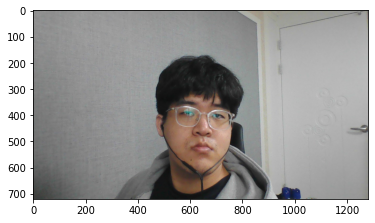

In [2]:
my_image_path = './images/WIN_20250124_10_40_16_Pro.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show() 

In [3]:
detector_hog = dlib.get_frontal_face_detector()

In [4]:
dlib_rects = detector_hog(img_rgb, 1)

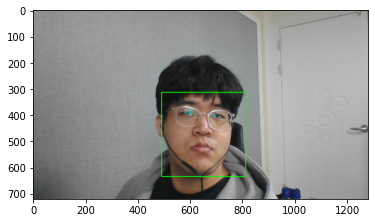

In [5]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
print(dlib_rects)

rectangles[[(491, 313) (812, 634)]]


In [7]:
model_path = './shape_predictor_68_face_landmarks.dat'

In [8]:
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = [] 

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        
    list_landmarks.append(list_points)
        

print(len(list_landmarks[0]))

68


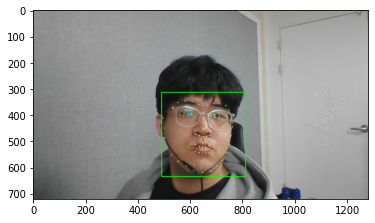

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)

plt.show()
 

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(654, 450)
(x,y) : (654,289)
(w,h) : (322,322)


In [12]:
sticker_path = './images/cat.png'

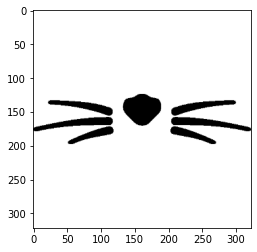

In [13]:
img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

In [14]:
img_sticker.shape

(322, 322, 3)

In [15]:
refined_x = x - w // 2
refined_y = y 
print(refined_x,refined_y )

493 289


In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

In [17]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==[255,255,255],sticker_area,img_sticker).astype(np.uint8)

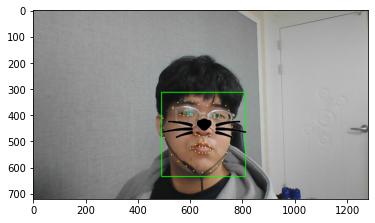

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

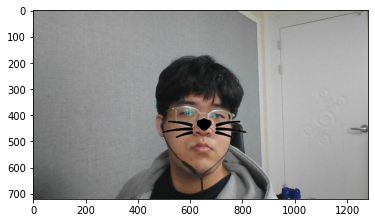

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==[255,255,255],sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [65]:

def dlib_rect_show(img,img_show):

    dlib_rects = detector_hog(img, 1)

    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    return dlib_rects,img_show_rgb

In [66]:

def landmark(model_path,img_rgb,img_show,dlib_rect):
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = [] 

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)

        list_points = list(map(lambda p: (p.x, p.y), points.parts()))

        list_landmarks.append(list_points)
            
    img_show_copy = img_show.copy()

    # 이미지에 랜드마크 시각화
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show_copy, point, 2, (0, 255, 255), -1)  # 노란색 점
    img_show_copy_rgb = cv2.cvtColor(img_show_copy, cv2.COLOR_BGR2RGB)

    return list_landmarks,img_show_copy_rgb    

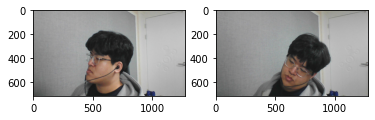

In [67]:
#실험 이미지 설정(다양한 각도에서 얼굴 인식)
test_img1 = cv2.imread('./images/WIN_20250124_10_40_19_Pro.jpg')  #수평 회전 
img1_show = test_img1.copy()
img1_rgb = cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB)

test_img2 = cv2.imread('./images/WIN_20250124_10_40_27_Pro.jpg')  #수직 회전
img2_show = test_img2.copy()
img2_rgb = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img1_rgb)
plt.subplot(1,2,2)
plt.imshow(img2_rgb)
plt.show()

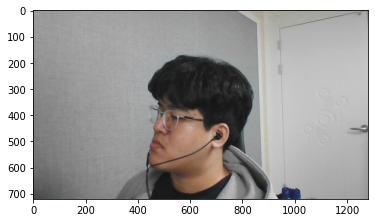

In [68]:
img1_dlib_rects,_ = dlib_rect_show(img1_rgb,img1_show)# 고개를 돌렸을 때는아예 얼굴 인식을 못한다

In [70]:
list_landmarks,img_show_copy_rgb  = landmark(model_path,img1_rgb,img1_show,img1_dlib_rects) # 이상하게 인식함

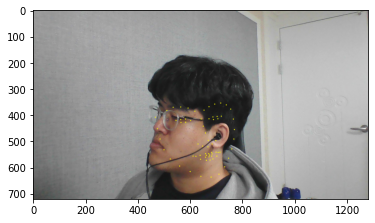

In [72]:
plt.imshow(img_show_copy_rgb)
plt.show()

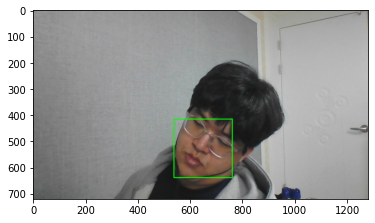

In [74]:
img2_dlib_rects,_ = dlib_rect_show(img2_rgb,img2_show)

In [75]:
_,img_show_copy_rgb = landmark(model_path,img2_rgb,img2_show,img2_dlib_rects) # 기울어진 이미지에 대해서는 아무런 조치도 없이 정방향 그대로 출력됨.

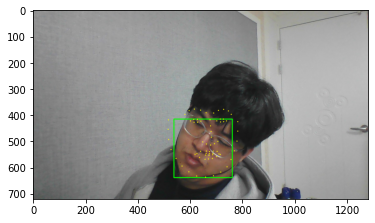

In [76]:
plt.imshow(img_show_copy_rgb)
plt.show()

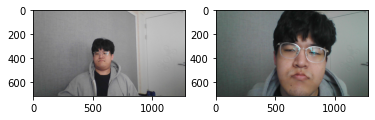

In [77]:
#실험 이미지 설정(촬영 거리에 따른 변화 실험)
test_img3 = cv2.imread('./images/WIN_20250124_14_09_46_Pro.jpg') # 먼 거리 이미지
img3_show = test_img3.copy()
img3_rgb = cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB)

test_img4 = cv2.imread('./images/WIN_20250124_14_10_00_Pro.jpg') # 가까운 거리 이미지
img4_show = test_img4.copy()
img4_rgb = cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img3_rgb)
plt.subplot(1,2,2)
plt.imshow(img4_rgb)
plt.show()

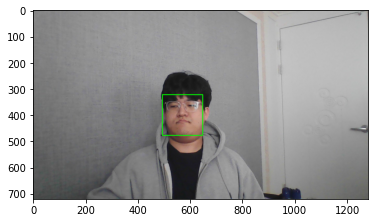

In [78]:
img3_dlib_rects = dlib_rect_show(img3_rgb,img3_show)

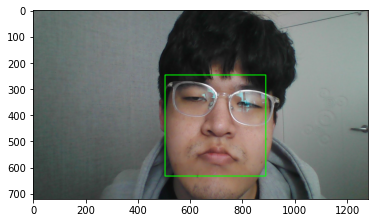

In [80]:
img4_dlib_rects = dlib_rect_show(img4_rgb,img4_show)

In [81]:
_,imshow3 = landmark(model_path,img3_rgb,img3_show,img3_dlib_rects) # 거리가 멀어지니 매우 이상하게 인식
_,imshow4 = landmark(model_path,img4_rgb,img4_show,img4_dlib_rects)# 거리가 가까워지니 위치는 어느정도 맞추지만 얼굴 크기를 맞추지 못함.

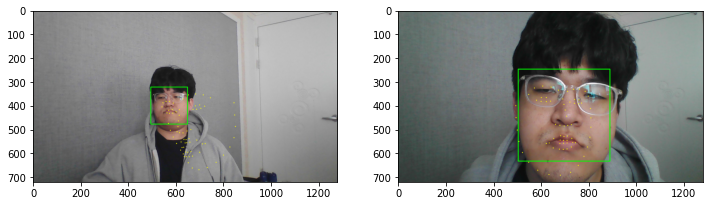

In [85]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(imshow3)
plt.subplot(1,2,2)
plt.imshow(imshow4)
plt.show()

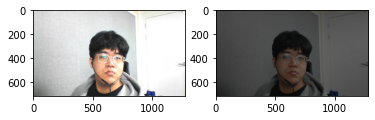

In [52]:
#실험 이미지 설정(이미지 밝기에 따른 변화 실험)
test_img_raw = cv2.imread('./images/WIN_20250124_10_40_16_Pro.jpg') 
test_img5 = np.clip(test_img_raw * 1.5, 0, 255).astype(np.uint8) # 50% 더 밝게 조정한 이미지
img5_show = test_img5.copy()
img5_rgb = cv2.cvtColor(img5_show, cv2.COLOR_BGR2RGB)

test_img6 = np.clip(test_img_raw * 0.5, 0, 255).astype(np.uint8) # 50% 더 밝게 조정한 이미지
img6_show = test_img6.copy()
img6_rgb = cv2.cvtColor(img6_show, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img5_rgb)
plt.subplot(1,2,2)
plt.imshow(img6_rgb)
plt.show()

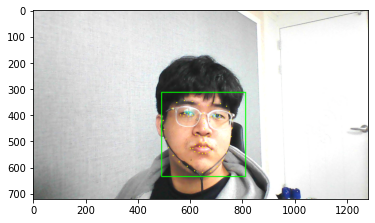

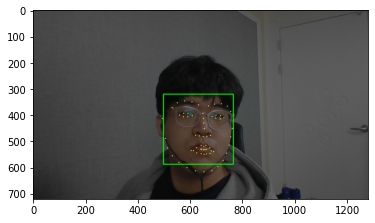

In [86]:
img5_dlib_rects = dlib_rect_show(img5_rgb,img5_show)
img6_dlib_rects = dlib_rect_show(img6_rgb,img6_show)

In [87]:
_,imshow5 = landmark(model_path,img5_rgb,img5_show,img5_dlib_rects)
_,imshow6 = landmark(model_path,img6_rgb,img6_show,img6_dlib_rects) # 이미지 밝기에는 크게 영향을 받지 않았다.

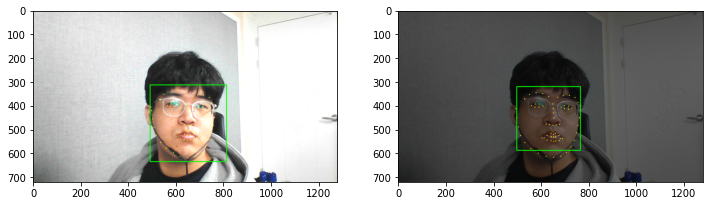

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(imshow5)
plt.subplot(1,2,2)
plt.imshow(imshow6)
plt.show()

In [57]:
### 중간 점검 밝기에는 큰 영향을 받지 않지만 정면을 바라보며 적당한 거리를 유지해야만 모델이 잘 유추하는 것을 확인함.
### 정면을 바라보고 있지만 얼굴이 정자세(회전하지 않은 상태)가 아니라면 잘 유추해내지 못하는 것 같음.
### 정면에서 정자세로 봐야만 제대로 작동하는 확인하기 위해서 이미지 회전 후 모델 적용하는 실험을 하면 좋을 것 같음.

In [58]:
def rotate_img(img,angle):
    (h, w) = img.shape[:2]  # 이미지 높이와 너비
    center = (w // 2, h // 2)  # 이미지 중심 좌표
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0) # 이미지 회전 행렬 계산
    rotated = cv2.warpAffine(img, rotation_matrix, (w, h)) # 이미지 회전
    return rotated

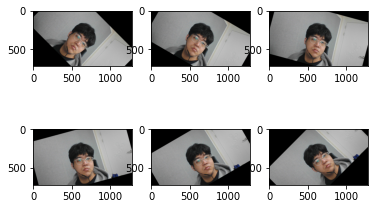

In [59]:
angle = [-45,-30,-15,15,30,45]
test_img7 = rotate_img(test_img_raw,angle[0])
img7_show = test_img7.copy()
img7_rgb = cv2.cvtColor(img7_show, cv2.COLOR_BGR2RGB)

test_img8 = rotate_img(test_img_raw,angle[1])
img8_show = test_img8.copy()
img8_rgb = cv2.cvtColor(img8_show, cv2.COLOR_BGR2RGB)

test_img9 = rotate_img(test_img_raw,angle[2])
img9_show = test_img9.copy()
img9_rgb = cv2.cvtColor(img9_show, cv2.COLOR_BGR2RGB)

test_img10 = rotate_img(test_img_raw,angle[3])
img10_show = test_img10.copy()
img10_rgb = cv2.cvtColor(img10_show, cv2.COLOR_BGR2RGB)

test_img11 = rotate_img(test_img_raw,angle[4])
img11_show = test_img11.copy()
img11_rgb = cv2.cvtColor(img11_show, cv2.COLOR_BGR2RGB)

test_img12 = rotate_img(test_img_raw,angle[5])
img12_show = test_img12.copy()
img12_rgb = cv2.cvtColor(img12_show, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,1)
plt.imshow(img7_rgb)
plt.subplot(2,3,2)
plt.imshow(img8_rgb)
plt.subplot(2,3,3)
plt.imshow(img9_rgb)
plt.subplot(2,3,4)
plt.imshow(img10_rgb)
plt.subplot(2,3,5)
plt.imshow(img11_rgb)
plt.subplot(2,3,6)
plt.imshow(img12_rgb)
plt.show()


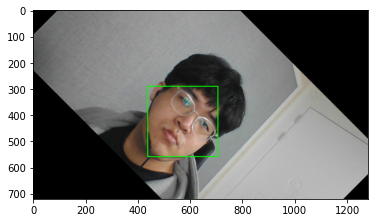

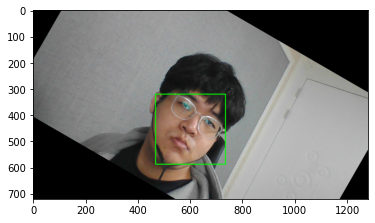

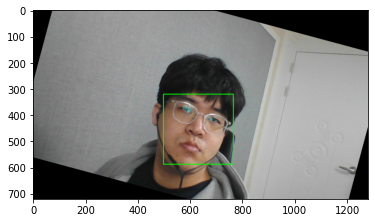

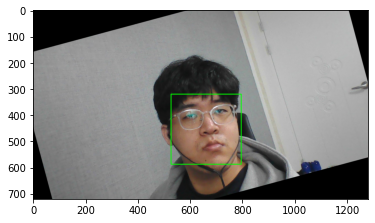

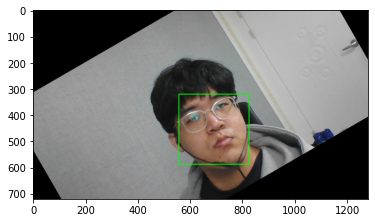

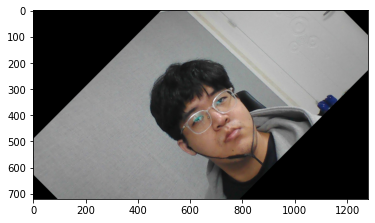

In [89]:
img7_dlib_rects = dlib_rect_show(img7_rgb,img7_show)
img8_dlib_rects = dlib_rect_show(img8_rgb,img8_show)
img9_dlib_rects = dlib_rect_show(img9_rgb,img9_show)
img10_dlib_rects = dlib_rect_show(img10_rgb,img10_show)
img11_dlib_rects = dlib_rect_show(img11_rgb,img11_show)
img12_dlib_rects = dlib_rect_show(img12_rgb,img12_show)

In [90]:
_,imshow7 = landmark(model_path,img7_rgb,img7_show,img7_dlib_rects)
_,imshow8 = landmark(model_path,img8_rgb,img8_show,img8_dlib_rects)
_,imshow9 = landmark(model_path,img9_rgb,img9_show,img9_dlib_rects)
_,imshow10 = landmark(model_path,img10_rgb,img10_show,img10_dlib_rects)
_,imshow11 = landmark(model_path,img11_rgb,img11_show,img11_dlib_rects)
_,imshow12 = landmark(model_path,img12_rgb,img12_show,img12_dlib_rects)

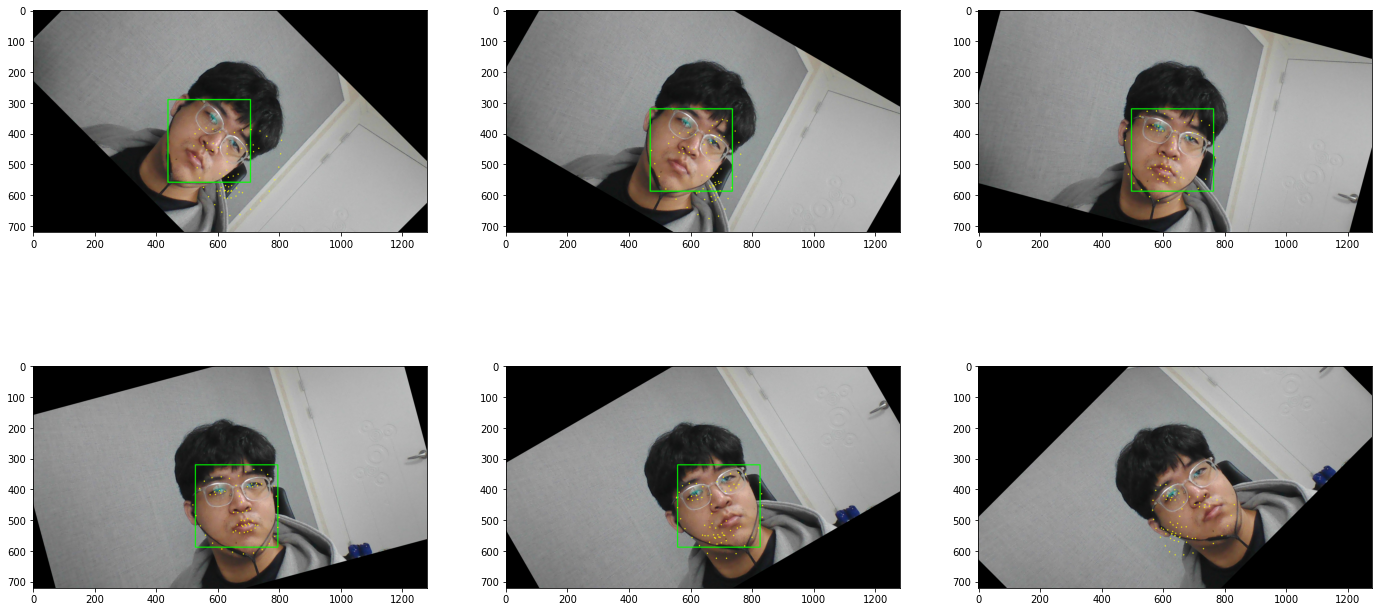

In [94]:
plt.figure(figsize=(24, 12))
plt.subplot(2,3,1)
plt.imshow(imshow7)
plt.subplot(2,3,2)
plt.imshow(imshow8)
plt.subplot(2,3,3)
plt.imshow(imshow9)
plt.subplot(2,3,4)
plt.imshow(imshow10)
plt.subplot(2,3,5)
plt.imshow(imshow11)
plt.subplot(2,3,6)
plt.imshow(imshow12)
plt.show()

In [ ]:
### 15도 이상 회전된 이미지에서 모델이 제데로 인식하지 못함.